# This dataset contains crime data for the city of Vancouver on a year-by-year basis from 2003 to 2019.
**Data was colected by Vancouver police department and can be found https://data.vancouver.ca/datacatalogue/crime-data.htm** 


**In this analysis, I will be generating general stats and try to answer these questions :**
- Total Number of Crimes reported each year.
- Which type of Crimes are the most common?
- Which neighborhoods had the most crimes?
- Which day of the week and month of the year result in the most crimes?
- When Does Crime Most Often Happen- Day and hourly analysis?
- What are the most common crimes in Christmas day from 2003-2019?

In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')
import folium
from folium import plugins
from pyproj import Proj, transform
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
crime_df = pd.read_csv('crime.csv')

In [3]:
print(crime_df.info())
crime_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613900 entries, 0 to 613899
Data columns (total 10 columns):
TYPE             613900 non-null object
YEAR             613900 non-null int64
MONTH            613900 non-null int64
DAY              613900 non-null int64
HOUR             552413 non-null float64
MINUTE           552413 non-null float64
HUNDRED_BLOCK    613887 non-null object
NEIGHBOURHOOD    549941 non-null object
X                613900 non-null float64
Y                613900 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 46.8+ MB
None


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Residential/Other,2003,12,7,21.0,30.0,36XX E 47TH AVE,Killarney,498148.47,5452617.84
1,Break and Enter Residential/Other,2003,2,9,18.0,0.0,16XX GRANT ST,Grandview-Woodland,494890.46,5457626.75
2,Theft from Vehicle,2003,1,8,11.0,45.0,19XX W 11TH AVE,Kitsilano,489121.18,5456575.35
3,Theft from Vehicle,2003,3,20,18.0,0.0,19XX VINE ST,Kitsilano,488546.95,5457304.88
4,Theft from Vehicle,2003,2,19,17.0,30.0,19XX VINE ST,Kitsilano,488546.95,5457304.88


There are some missing data in the 'HOUR' and 'Neighbourhood' columns, per the data dictionary, no time information is provided for offenses against a person crime type, but that shouldn't be a problem for this analysis.

I will create a date column that combines year, month and day in one column and check to see if we have enough data for 2018 to analyze

In [18]:
crime_df['Date'] = pd.to_datetime(crime_df[['YEAR', 'MONTH', 'DAY']])
crime_df['Date'].head()

0   2003-12-07
1   2003-02-09
2   2003-01-08
3   2003-03-20
4   2003-02-19
Name: Date, dtype: datetime64[ns]

In [19]:
crime_df['Date'].max()
#Last date of Crime in the dataset

Timestamp('2019-08-30 00:00:00')

## Total Number of Crimes reported each year

Let's check the Total number of crimes from 2013 to 2019.

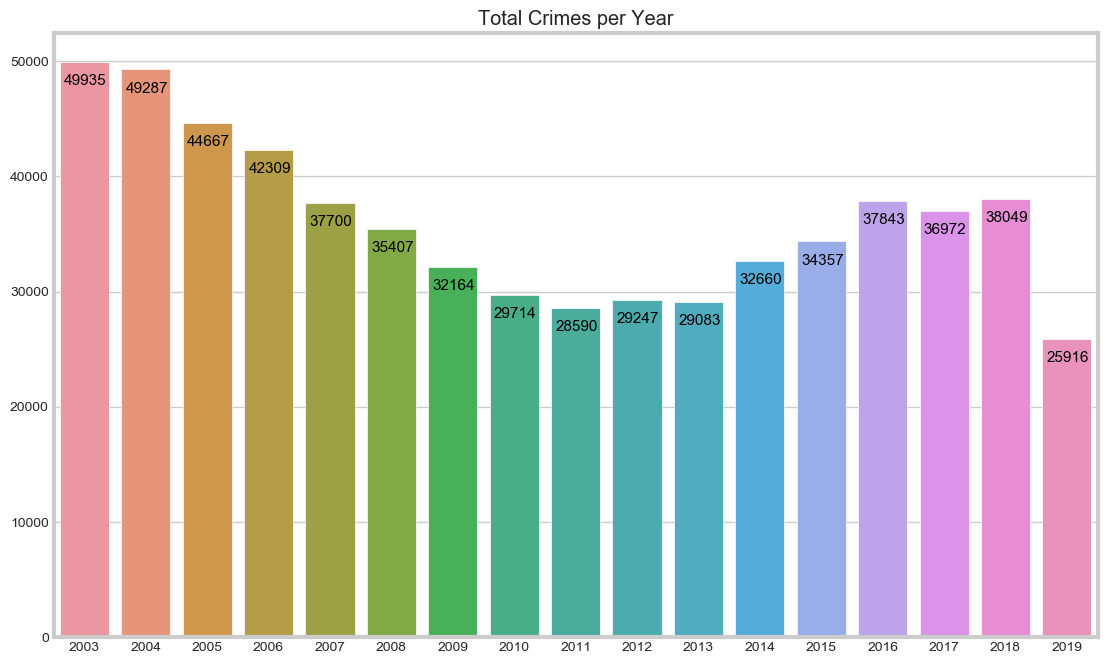

In [25]:
plt.figure(figsize=(12,8),dpi=100)
graph = sns.countplot(x='YEAR', data=crime_df)
plt.title('Total Crimes per Year')
graph.xaxis.label.set_visible(False)
graph.yaxis.label.set_visible(False)

# setting individual bar lables using above list
for i in graph.patches:
    # get_x pulls left or right; get_height pushes up or down
    graph.text(i.get_x()+.07, i.get_height()-2000, str(i.get_height()), fontsize=11, color='black')    

plt.show()

## Insights:
**It seems that most crimes happened in 2003, the total number decreased every year until 2011 which has the lowest total number of crimes. The total number of crimes increased after that and peaked at 2018. We also know that data for 2019 is not complete, so the total for 2019 could increase.**

## Most common Type of crime from 2003 to 2019

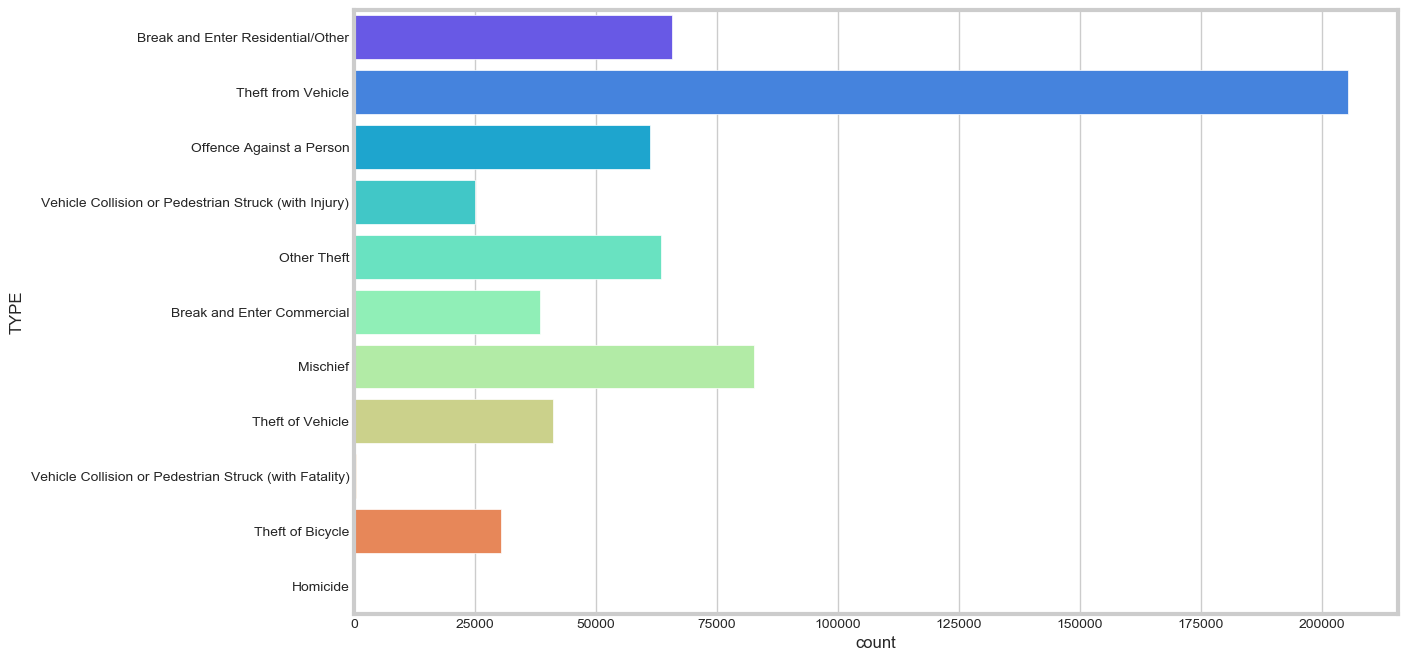

In [28]:
fig = plt.figure(figsize=(12,8),dpi=100)
sns.countplot(y='TYPE',data=crime_df,palette='rainbow')
    

## Insights

**We can see that the most common crime type is "Theft from Vehicle", and the least common types are "Homicide" , "Vehicle Collision and Pedestrian Struck (with Fatality)"**


## 5 Neighborhoods with most crimes

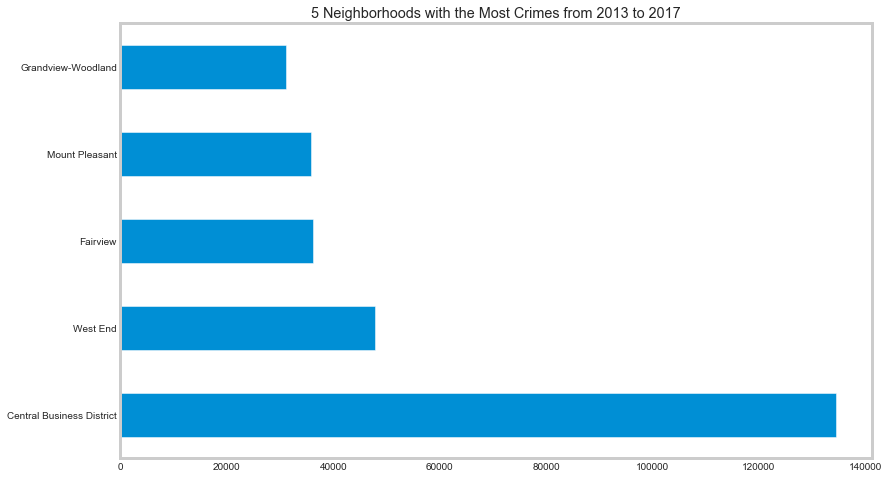

In [30]:
crime_loc = crime_df.groupby('NEIGHBOURHOOD')['TYPE'].count().sort_values(ascending = False)
crime_top_5 = crime_loc[:5]
graph = crime_top_5.plot.barh(figsize=(12,8), title = '5 Neighborhoods with the Most Crimes from 2013 to 2017')
graph.xaxis.label.set_visible(False)
graph.yaxis.label.set_visible(False)
plt.grid(False)
plt.show()

## Insights
**We notice that Central Business Distict is in the top of the list**

##  Monthly trend for each crime type

Is there a monthly trend for the different type of crimes?

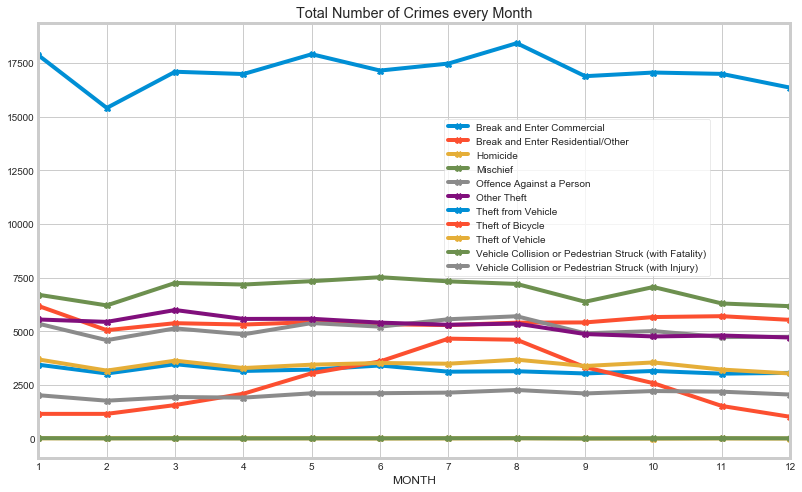

In [40]:
# Group the dataframe by month and type of crime
crimes_trend = crime_df.groupby(["MONTH","TYPE"])['TYPE'].count().unstack()
graph = crimes_trend.plot(figsize=(12,8), title = 'Total Number of Crimes every Month',
                          rot = 0, marker='X')
plt.xticks(np.arange(1,13))

# Put a legend to the right of the current axis
plt.legend(loc='best', bbox_to_anchor=(0.9,0.6))
plt.show()

## Insight:

There is no trend except for the theft of bicycle, bicyle theft in summer makes sense as people would be using their bikes more during summer, and for theft from vehicle appears to decline in February and December, but there is no reason why.

## Which day of the week and which month of the year results in most crimes?


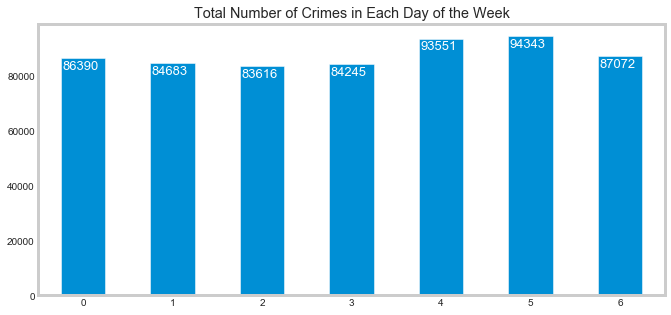

In [42]:
# Plotting a bar chart for which day of the week result in most crimes
graph = crime_df['Date'].dt.weekday.value_counts().sort_index().plot.bar(figsize=(10,5), 
                title = 'Total Number of Crimes in Each Day of the Week', rot = 0 )
plt.grid(False)

# setting individual bar lables using above list
for i in graph.patches:
    # get_x pulls left or right; get_height pushes up or down
    graph.text(i.get_x()+.02, i.get_height()-4000, str(i.get_height()), fontsize=13, color='white')    

plt.show()

## Insight:
**In this plot, Monday is 0, and Sunday is 6. It looks like most crimes happened on Saturdays, but there isn't a big difference. Let's check in which month of the year most crimes happened**

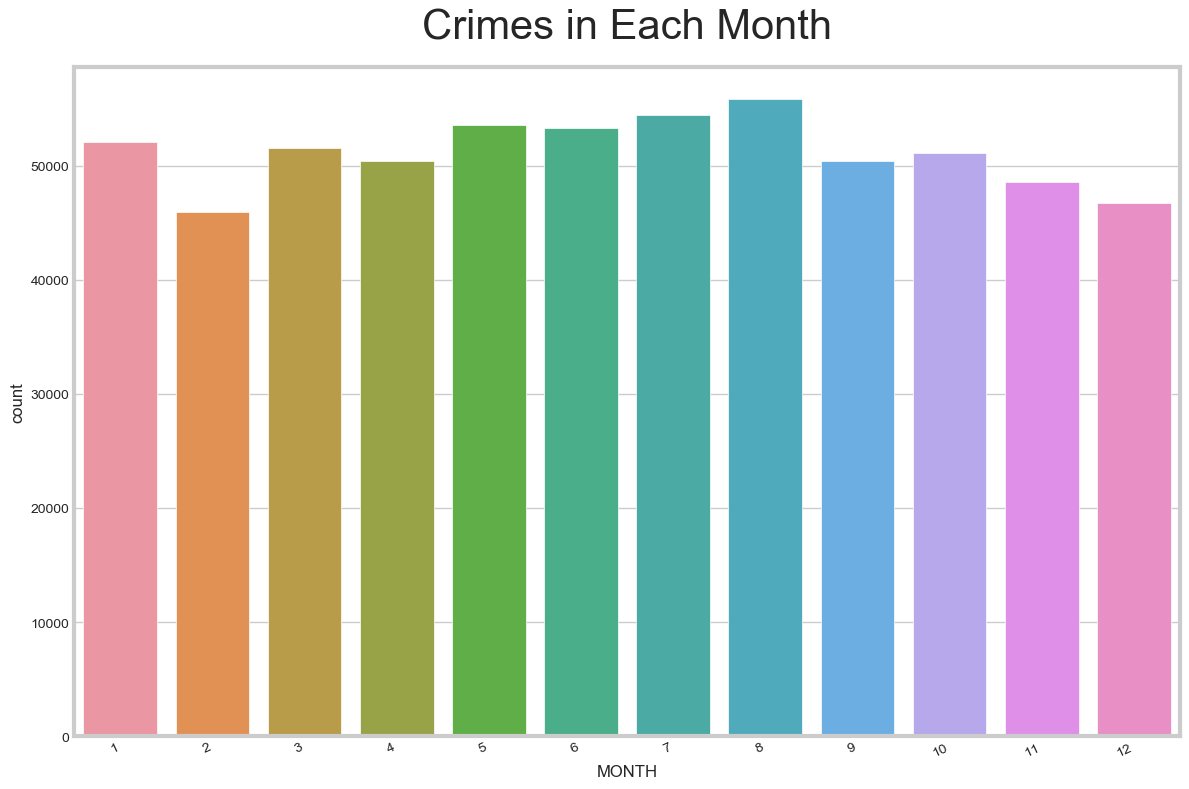

In [59]:
plt.figure(figsize=(12,8),dpi=100)
plt.title('Crimes in Each Month',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='MONTH',data=crime_df)
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()

## Insight:
**Maximum crimes happened in August and the least happened in February, but we cannot conclude anything yet. Let's check and find out When did most of these crimes happened?**

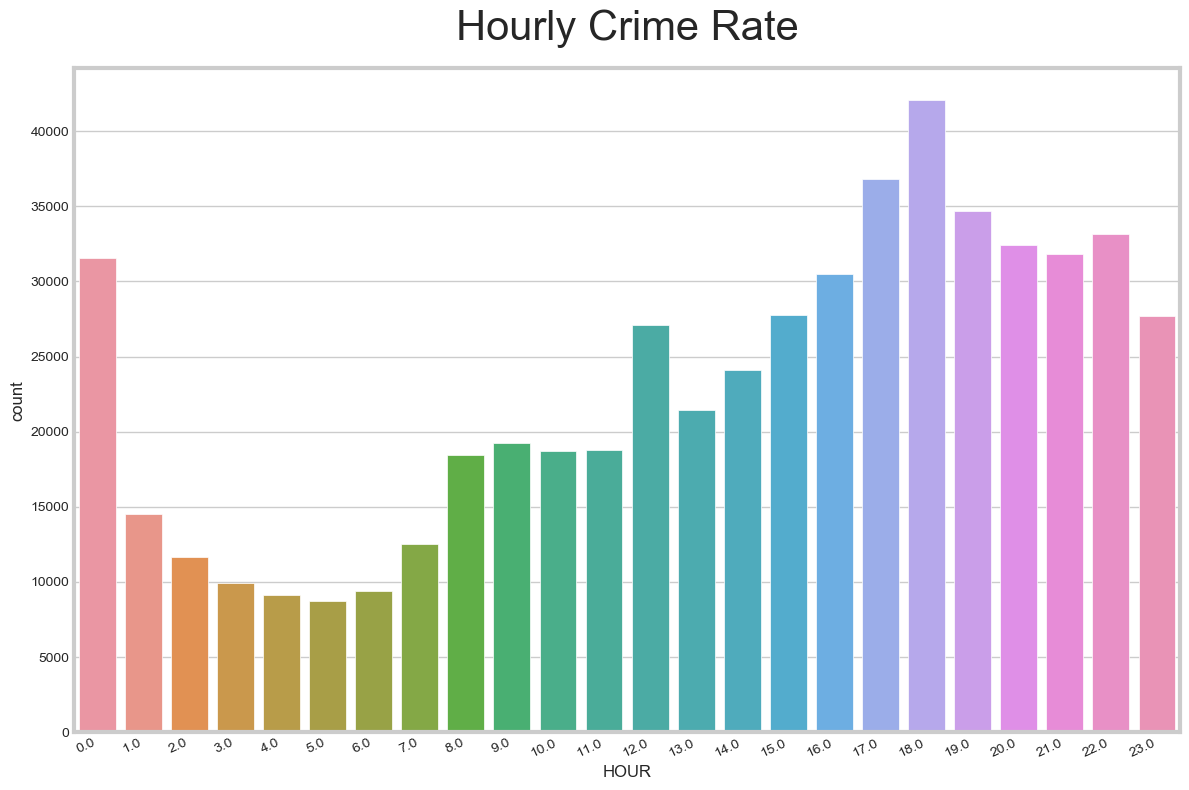

In [58]:
plt.figure(figsize=(12,8),dpi=100)
plt.title('Hourly Crime Rate',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='HOUR',data=crime_df)
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()

## Insight:

**Interestingly, most crimes happened at 6 PM (18:00 hours) and the least total number of crimes happened at 5 AM. We would have guessed crimes would mostly occur after midnight.**

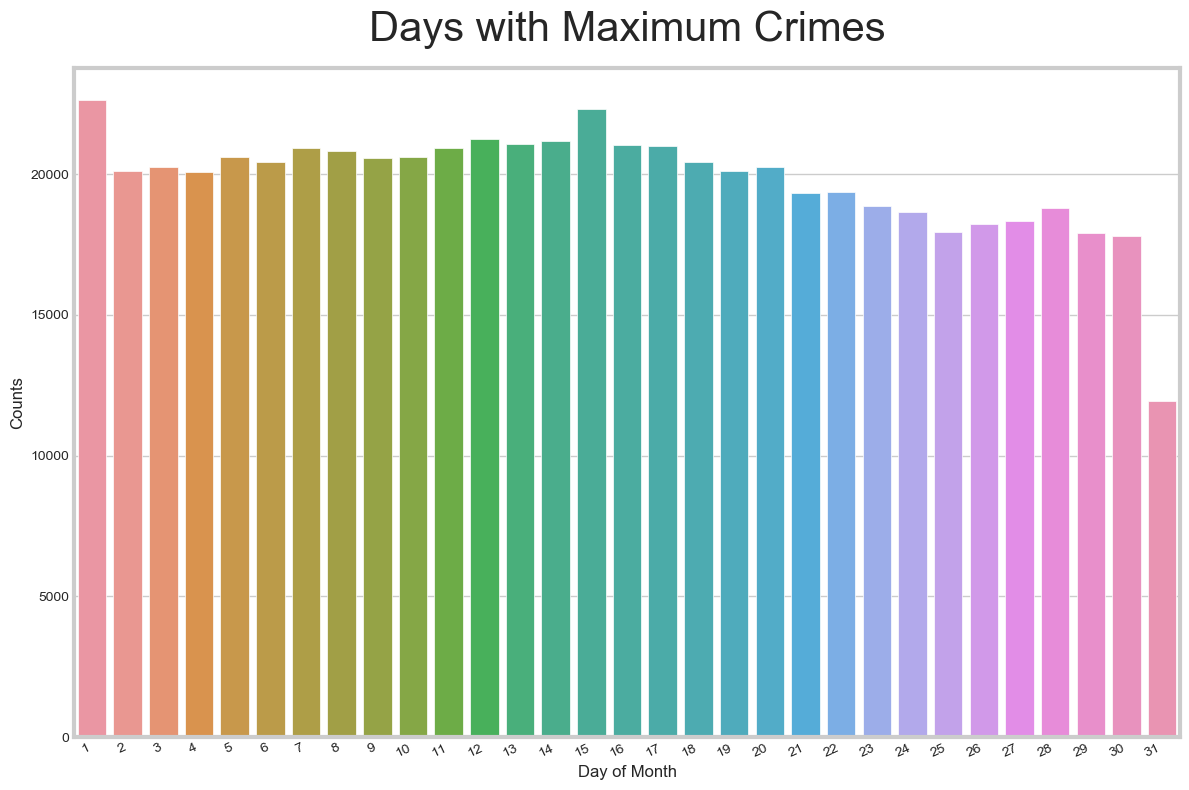

In [57]:
plt.figure(figsize=(12,8),dpi=100)
plt.title('Days with Maximum Crimes',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='DAY',data=crime_df)
ax.set(xlabel='Day of Month')
ax.set(ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()

## Insight:
**Interestingly, the 1st day and the 15th day of each month were recorded with maximum crimes. And on 31st day of the month with least crimes.**

## Most common crimes that happen during Christmas day from 2003-2019

In [52]:
chris_df = crime_df[(crime_df['MONTH'] == 12) & (crime_df['DAY'] == 25)]

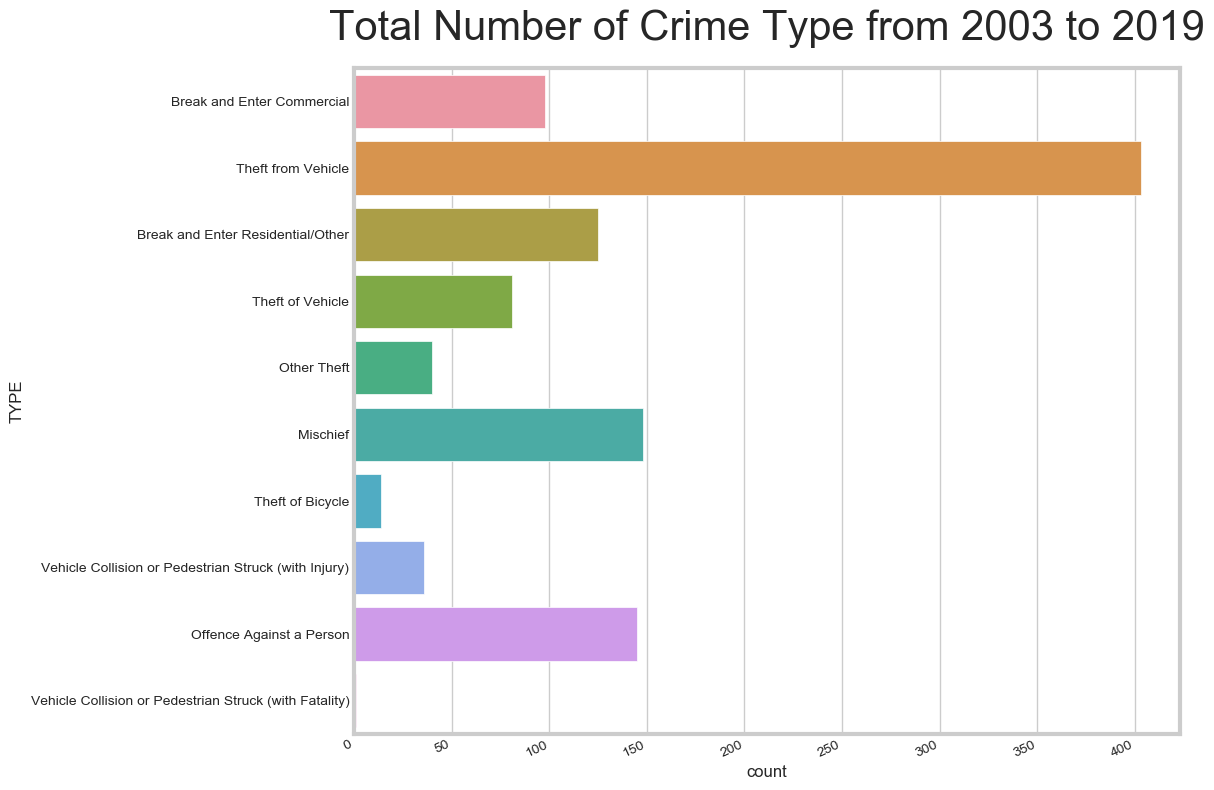

In [56]:
plt.figure(figsize=(12,8),dpi=100)
plt.title('Total Number of Crime Type from 2003 to 2019',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(y='TYPE',data=chris_df)
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()

## Insight:

**It seems that theft from a vehicle is the most common crime type during Christmas too, next is the offence against a person and mischief**